# Predicting hospital admission at emergency department triage using machine learning.
## Prediction Evaluation with: XGBoost
XGBoost is an excellent choice for predicting hospital admissions at emergency department triage due to its ability to handle large datasets efficiently and deliver high accuracy. It is known for its powerful gradient boosting framework, which enhances predictive performance through boosting techniques. XGBoost also offers extensive hyperparameter tuning options, allowing for fine-tuning to achieve optimal results. Additionally, it provides tools for understanding feature importance, making it suitable for gaining insights in healthcare settings. XGBoost is optimized for speed and scalability, ensuring reliable predictions in critical environments where quick and accurate decision-making is essential

In [1]:
# import os
# import IPython

# # Function to restart the kernel
# def restart_kernel():
#     os._exit(00)

# # Restart the kernel
# restart_kernel()

In [2]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/95/a4/16490d38b4854a1ce4995f4088bcb701b5057f711e34c95cd6e29792cdde/xgboost-2.1.2-py3-none-manylinux_2_28_x86_64.whl.metadata
  Obtaining dependency information for nvidia-nccl-cu12 from https://files.pythonhosted.org/packages/ed/1f/6482380ec8dcec4894e7503490fc536d846b0d59694acad9cf99f27d0e7d/nvidia_nccl_cu12-2.23.4-py3-none-manylinux2014_x86_64.whl.metadata
Using cached xgboost-2.1.2-py3-none-manylinux_2_28_x86_64.whl (153.9 MB)
Using cached nvidia_nccl_cu12-2.23.4-py3-none-manylinux2014_x86_64.whl (199.0 MB)


In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import resample
import gc
import datetime
import gc
 

In [4]:
import pandas as pd
# Load  dataset
data = pd.read_csv('./admission.csv')

# Train and evaluate the model with a specified number of components=200 for SVD

Start Time: 2024-10-27 00:32:10.495308


/home/faruque/anaconda3/envs/my_env/lib/python3.10/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['phencyclidine(pcp)screen,urine,noconf._last'
 'phencyclidine(pcp)screen,urine,noconf._min'
 'phencyclidine(pcp)screen,urine,noconf._max'
 'phencyclidine(pcp)screen,urine,noconf._median']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/home/faruque/anaconda3/envs/my_env/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [00:35:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Machine Learning Model: XGBoost Classifier
Hyperparameters:
  subsample: 1.0
  n_estimators: 500
  max_depth: 6
  learning_rate: 0.1
  colsample_bytree: 1.0
  use_label_encoder: False
  eval_metric: logloss
  random_state: 42

Accuracy: 0.8531195917857589
Precision: 0.8654259378852815
Confusion Matrix:
[[21929 11461]
 [ 5004 73704]]
AUROC: 0.9089270600476218
Sensitivity/Recall: 0.9364232352492758
Specificity: 0.65675351901767
F1 Score: 0.8995258523368707
Accuracy Interpretability Index: 0.8422496272549715


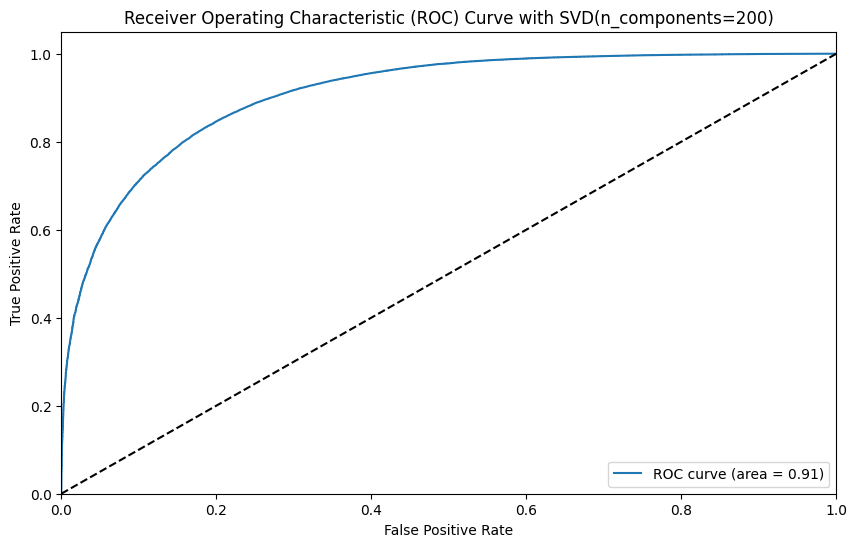

Accuracy: 0.8531 (95% CI: 0.8511 - 0.8552)
Precision: 0.8655 (95% CI: 0.8633 - 0.8678)
Recall: 0.9364 (95% CI: 0.9347 - 0.9382)
F1 Score: 0.8996 (95% CI: 0.8981 - 0.9011)
AUROC: 0.9089 (95% CI: 0.9070 - 0.9107)
Specificity: 0.6568 (95% CI: 0.6517 - 0.6619)


In [5]:

# Record the start time
start_time = datetime.datetime.now()
print(f"Start Time: {start_time}")
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Prepare the data
X = data.drop(columns=['disposition'])
y = data['disposition']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing pipelines for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),   
            ('scaler', StandardScaler())  
        ]), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  
        ]), categorical_cols)
    ])

# Function to evaluate SVD with XGBoost
def evaluate_svd(n_components):
    # Create a pipeline to preprocess and apply SVD
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('svd', TruncatedSVD(n_components=n_components, random_state=42))
    ])

    # Transform the data
    X_svd = pipeline.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_svd, y_encoded, test_size=0.2, random_state=42)

    # Initialize and train the XGBoost model
    xgb_model = XGBClassifier(
        subsample=1.0,
        n_estimators=500,
        max_depth=6,
        learning_rate=0.1,
        colsample_bytree=1.0,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
    xgb_model.fit(X_train, y_train)

    # Print the machine learning model and hyperparameters used
    print("Machine Learning Model: XGBoost Classifier")
    print("Hyperparameters:")
    print(f"  subsample: {xgb_model.get_params()['subsample']}")
    print(f"  n_estimators: {xgb_model.get_params()['n_estimators']}")
    print(f"  max_depth: {xgb_model.get_params()['max_depth']}")
    print(f"  learning_rate: {xgb_model.get_params()['learning_rate']}")
    print(f"  colsample_bytree: {xgb_model.get_params()['colsample_bytree']}")
    print(f"  use_label_encoder: {xgb_model.get_params()['use_label_encoder']}")
    print(f"  eval_metric: {xgb_model.get_params()['eval_metric']}")
    print(f"  random_state: {xgb_model.get_params()['random_state']}")

    # Make predictions and evaluate the model
    y_pred = xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
    interpretability_index = (accuracy + precision + recall + specificity + f1) / 5

    # Print the evaluation metrics in the specified template format
    print(f"\nAccuracy: {accuracy}")
    print(f"Precision: {precision}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"AUROC: {auc}")
    print(f"Sensitivity/Recall: {recall}")
    print(f"Specificity: {specificity}")
    print(f"F1 Score: {f1}")
    print(f"Accuracy Interpretability Index: {interpretability_index}")

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve with SVD(n_components={n_components})')
    plt.legend(loc='lower right')
    plt.show()

    # Bootstrap resampling for confidence intervals
    n_iterations = 1000
    metrics = np.zeros((n_iterations, 6))

    for i in range(n_iterations):
        X_resampled, y_resampled = resample(X_test, y_test, random_state=i)
        y_pred_resampled = xgb_model.predict(X_resampled)
        y_proba_resampled = xgb_model.predict_proba(X_resampled)[:, 1]
        metrics[i] = calculate_metrics(y_resampled, y_pred_resampled, y_proba_resampled)

    mean_metrics = np.mean(metrics, axis=0)
    ci_lower = np.percentile(metrics, 2.5, axis=0)
    ci_upper = np.percentile(metrics, 97.5, axis=0)

    metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUROC', 'Specificity']
    
    for mean, lower, upper, name in zip(mean_metrics, ci_lower, ci_upper, metric_names):
        print(f'{name}: {mean:.4f} (95% CI: {lower:.4f} - {upper:.4f})')

# Function to calculate evaluation metrics
def calculate_metrics(y_true, y_pred, y_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_proba)
    conf_matrix = confusion_matrix(y_true, y_pred)
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
    return accuracy, precision, recall, f1, auc, specificity

# Train and evaluate the model with a specified number of components for SVD
evaluate_svd(n_components=200)



# Train and evaluate the model with a specified number of components=300 for SVD

Start Time: 2024-10-27 00:48:11.753639


/home/faruque/anaconda3/envs/my_env/lib/python3.10/site-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['phencyclidine(pcp)screen,urine,noconf._last'
 'phencyclidine(pcp)screen,urine,noconf._min'
 'phencyclidine(pcp)screen,urine,noconf._max'
 'phencyclidine(pcp)screen,urine,noconf._median']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/home/faruque/anaconda3/envs/my_env/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [00:51:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Machine Learning Model: XGBoost Classifier
Hyperparameters:
  subsample: 1.0
  n_estimators: 500
  max_depth: 6
  learning_rate: 0.1
  colsample_bytree: 1.0
  use_label_encoder: False
  eval_metric: logloss
  random_state: 42

Accuracy: 0.8544577066495388
Precision: 0.8666337599454689
Confusion Matrix:
[[22042 11348]
 [ 4967 73741]]
AUROC: 0.9106614868840976
Sensitivity/Recall: 0.9368933272348428
Specificity: 0.6601377657981432
F1 Score: 0.9003950011294468
Accuracy Interpretability Index: 0.8437035121514882


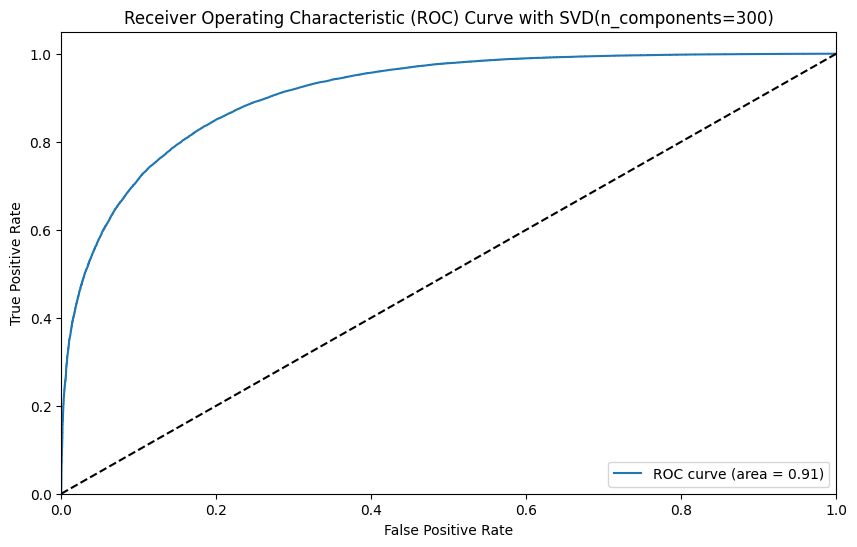

Accuracy: 0.8545 (95% CI: 0.8525 - 0.8566)
Precision: 0.8667 (95% CI: 0.8645 - 0.8689)
Recall: 0.9369 (95% CI: 0.9352 - 0.9386)
F1 Score: 0.9004 (95% CI: 0.8989 - 0.9019)
AUROC: 0.9106 (95% CI: 0.9088 - 0.9125)
Specificity: 0.6601 (95% CI: 0.6552 - 0.6650)


In [6]:

# Record the start time
start_time = datetime.datetime.now()
print(f"Start Time: {start_time}")
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Prepare the data
X = data.drop(columns=['disposition'])
y = data['disposition']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing pipelines for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),   
            ('scaler', StandardScaler())  
        ]), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  
        ]), categorical_cols)
    ])

# Function to evaluate SVD with XGBoost
def evaluate_svd(n_components):
    # Create a pipeline to preprocess and apply SVD
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('svd', TruncatedSVD(n_components=n_components, random_state=42))
    ])

    # Transform the data
    X_svd = pipeline.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_svd, y_encoded, test_size=0.2, random_state=42)

    # Initialize and train the XGBoost model
    xgb_model = XGBClassifier(
        subsample=1.0,
        n_estimators=500,
        max_depth=6,
        learning_rate=0.1,
        colsample_bytree=1.0,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
    xgb_model.fit(X_train, y_train)

    # Print the machine learning model and hyperparameters used
    print("Machine Learning Model: XGBoost Classifier")
    print("Hyperparameters:")
    print(f"  subsample: {xgb_model.get_params()['subsample']}")
    print(f"  n_estimators: {xgb_model.get_params()['n_estimators']}")
    print(f"  max_depth: {xgb_model.get_params()['max_depth']}")
    print(f"  learning_rate: {xgb_model.get_params()['learning_rate']}")
    print(f"  colsample_bytree: {xgb_model.get_params()['colsample_bytree']}")
    print(f"  use_label_encoder: {xgb_model.get_params()['use_label_encoder']}")
    print(f"  eval_metric: {xgb_model.get_params()['eval_metric']}")
    print(f"  random_state: {xgb_model.get_params()['random_state']}")

    # Make predictions and evaluate the model
    y_pred = xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
    interpretability_index = (accuracy + precision + recall + specificity + f1) / 5

    # Print the evaluation metrics in the specified template format
    print(f"\nAccuracy: {accuracy}")
    print(f"Precision: {precision}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"AUROC: {auc}")
    print(f"Sensitivity/Recall: {recall}")
    print(f"Specificity: {specificity}")
    print(f"F1 Score: {f1}")
    print(f"Accuracy Interpretability Index: {interpretability_index}")

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve with SVD(n_components={n_components})')
    plt.legend(loc='lower right')
    plt.show()

    # Bootstrap resampling for confidence intervals
    n_iterations = 1000
    metrics = np.zeros((n_iterations, 6))

    for i in range(n_iterations):
        X_resampled, y_resampled = resample(X_test, y_test, random_state=i)
        y_pred_resampled = xgb_model.predict(X_resampled)
        y_proba_resampled = xgb_model.predict_proba(X_resampled)[:, 1]
        metrics[i] = calculate_metrics(y_resampled, y_pred_resampled, y_proba_resampled)

    mean_metrics = np.mean(metrics, axis=0)
    ci_lower = np.percentile(metrics, 2.5, axis=0)
    ci_upper = np.percentile(metrics, 97.5, axis=0)

    metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUROC', 'Specificity']
    
    for mean, lower, upper, name in zip(mean_metrics, ci_lower, ci_upper, metric_names):
        print(f'{name}: {mean:.4f} (95% CI: {lower:.4f} - {upper:.4f})')

# Function to calculate evaluation metrics
def calculate_metrics(y_true, y_pred, y_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_proba)
    conf_matrix = confusion_matrix(y_true, y_pred)
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
    return accuracy, precision, recall, f1, auc, specificity

# Train and evaluate the model with a specified number of components for SVD
evaluate_svd(n_components=300)



In [7]:
# Record the end time
end_time = datetime.datetime.now()
print(f"End Time: {end_time}")

# Calculate the duration
duration = end_time - start_time
print(f"Duration: {duration}")

End Time: 2024-10-27 10:28:06.519754
Duration: 9:39:54.766115
